### Visualizing Categorical Data

In [1]:
import numpy as np
import pandas as pd 
import collections 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})


In [2]:
train_categorical_iter=pd.read_csv("../input/train_categorical.csv",chunksize=100000, dtype=str,usecols=list(range(1,2141)))
train_categorical_data = collections.defaultdict(set)


for chunk in train_categorical_iter: 
    for col in chunk:
        train_categorical_data[col] = train_categorical_data[col].union(chunk[col][chunk[col].notnull()].unique())

In [3]:
print ("Number of Features " +str(len(train_categorical_data.keys())))

Number of Features 2140


In [4]:
countEmpty=countSingle= countMultiple=0
for key in train_categorical_data.keys():
    if len(train_categorical_data[key])==0:
        countEmpty+=1
        continue
    if len(train_categorical_data[key])==1:
        countSingle+=1
        continue
    countMultiple+=1            

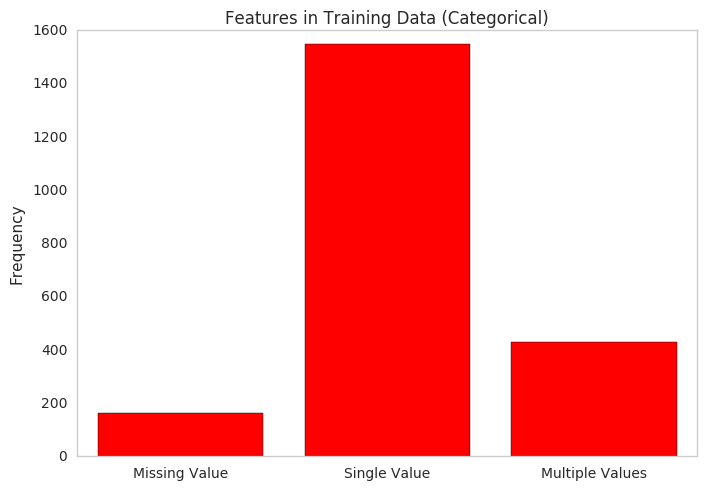

In [6]:
objects = ('Missing Value', 'Single Value', 'Multiple Values')

y_pos = np.arange(3)
 
plt.bar([0,1,2],[countEmpty, countSingle, countMultiple], align='center', color='r')
plt.xticks([0,1,2], objects)
plt.ylabel('Frequency')
plt.title('Features in Training Data (Categorical)')
plt.show()

### Observations: 

Some categorical features have mutliple values corresponding to them.

### Frequency of Features ###




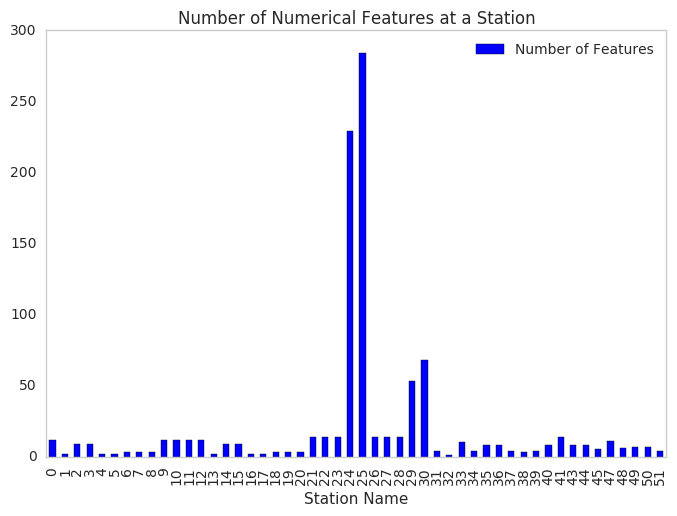

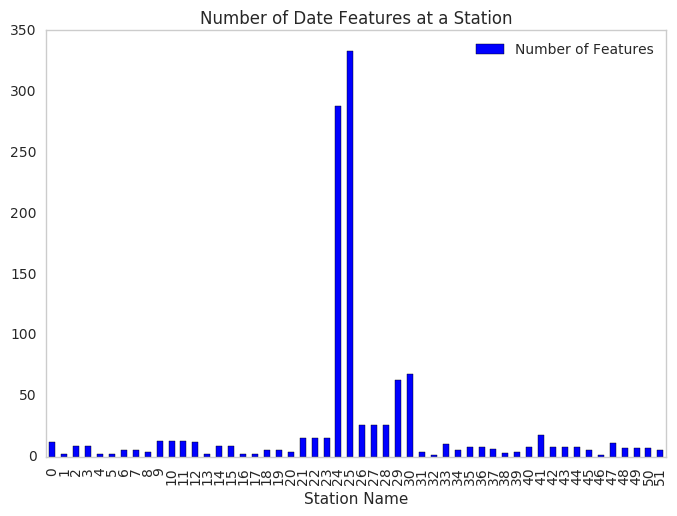

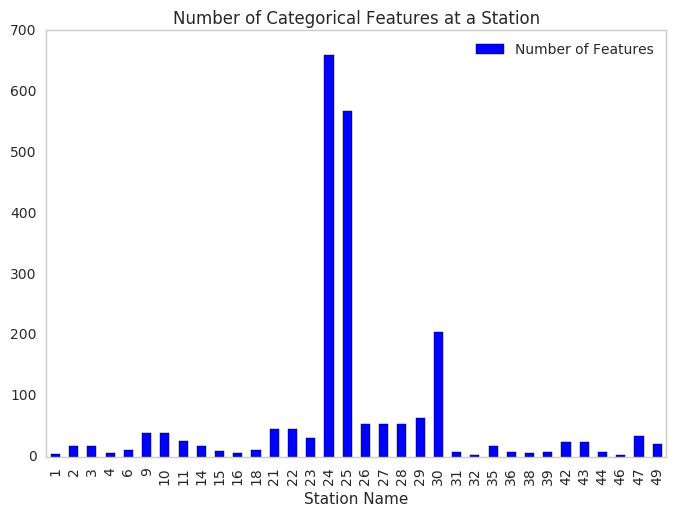

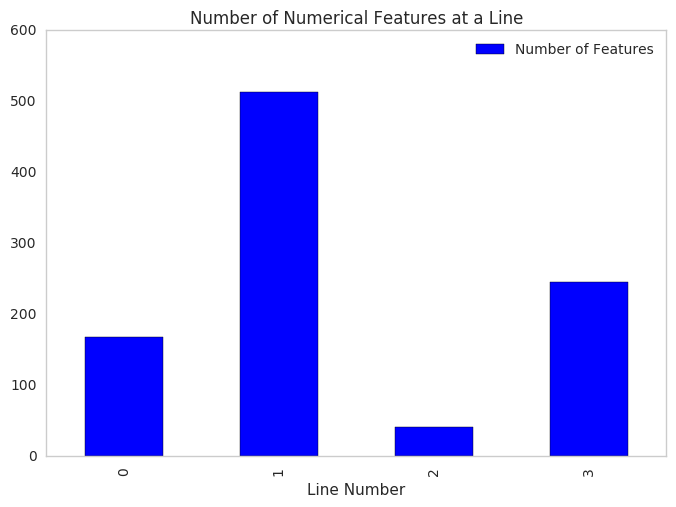

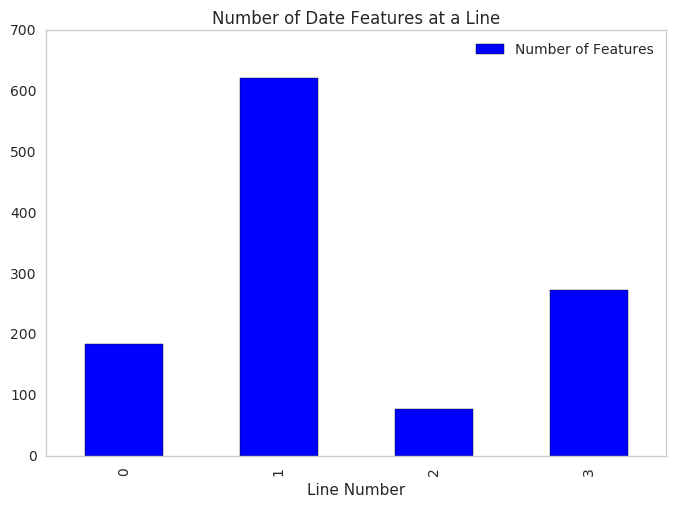

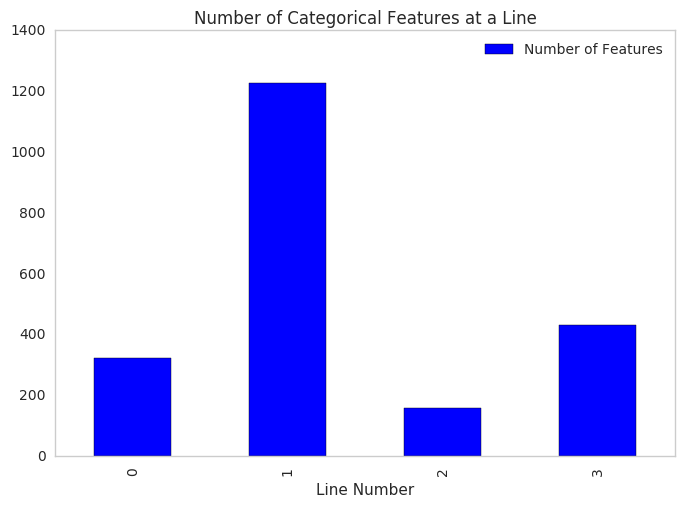

In [7]:
def plotFeatures(filename, xtitle, key):
    if "numeric" in filename:
        data = pd.read_csv(filename, nrows=1).drop(["Response", "Id"], axis=1).columns.values
    else:
        data = pd.read_csv(filename, nrows=1).drop(["Id"], axis=1).columns.values
    
        
    features = {}
    lines = set([dataPoint.split('_')[key] for dataPoint in data])
    
    for l in lines:
        features[l] = [item for item in data if l+'_' in item]
    xvalue = "Station Name"
    yvalue = "Number of Features"
    if key==0:
        xvalue = "Line Number"
    df = pd.DataFrame(list({int(key[1:]): len(features[key]) for
                         key in features.keys()}.items()),
                   columns=[xvalue, yvalue])

    stations_plot = df.plot(x=xvalue, y=yvalue, kind="bar",
                         title=xtitle,
                         color='blue')
    
        

plotFeatures("../input/train_numeric.csv", "Number of Numerical Features at a Station",1)
plotFeatures("../input/train_date.csv", "Number of Date Features at a Station",1)
plotFeatures("../input/train_categorical.csv", "Number of Categorical Features at a Station",1)


plotFeatures("../input/train_numeric.csv", "Number of Numerical Features at a Line",0)
plotFeatures("../input/train_date.csv", "Number of Date Features at a Line",0)
plotFeatures("../input/train_categorical.csv", "Number of Categorical Features at a Line",0)

## Observations
We tried to find relations between the different features, the stations they are recorded on, the production line the station is on, and the response variable corresponding to these observations to understand which features, stations and lines play more role than the others. Some of the interesting dataset explorations are recorded here. In the following report we observe the frequency of different features corresponding to the stations. We observe that a some stations (namely Station 24,25,29,30) have a very high number of features corresponding to them, while they are many stations that have very low number of features corresponding to them. These results do suggest some relative importance of stations in identifying the stations that perhaps play a more important role in deciding the response variable. 


We report similar trends for features with respect to different lines, suggesting the relative importance of one line over the other in deciding the Response Variable. It could be interpreted logically that when a product is probable to be defective it is shifted to a line where it undergoes more strict manufacturing tests. Thus having more number of features being recorded for it. 